In [1]:
import pandas  as pd
import numpy as np
dtframe = pd.read_csv('IMDB-Movie-Data.csv' ,index_col= 'Rank'  )
print(dtframe)


                        Title                     Genre  \
Rank                                                      
1     Guardians of the Galaxy   Action,Adventure,Sci-Fi   
2                  Prometheus  Adventure,Mystery,Sci-Fi   
3                       Split           Horror,Thriller   
4                        Sing   Animation,Comedy,Family   
5               Suicide Squad  Action,Adventure,Fantasy   
...                       ...                       ...   
996      Secret in Their Eyes       Crime,Drama,Mystery   
997           Hostel: Part II                    Horror   
998    Step Up 2: The Streets       Drama,Music,Romance   
999              Search Party          Adventure,Comedy   
1000               Nine Lives     Comedy,Family,Fantasy   

                                            Description              Director  \
Rank                                                                            
1     A group of intergalactic criminals are forced ...            Jam

### imputation (replacement)
#### In statistics, imputation is the process of replacing missing data with substituted values


In [ ]:
#You need to press m on your keyboard now you will see here this cell has been changed to the markdown then I am going to press here at 3 third Level of the heading and then I am going to write here in few ok I am going to is the conventional conventional way to introduce the feature that is conventional feature engineering technique used to keep valuable data that have null values there may be instances where dropping every row with null value remove too big chunk of data so instead we can improve that null with another value usually the mean is the median of that column let's look at the imputing the missing values in the revenue millions which we had earlier BF is Null right and song so even you we have 120 rows which have null value so we need to first take this revenue 

In [2]:
dtframe.head()

,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
Rank,,,,,,,,,,,
1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


In [3]:
dtframe.tail()

,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
Rank,,,,,,,,,,,
996,Secret in Their Eyes,"Crime,Drama,Mystery","A tight-knit team of rising investigators, alo...",Billy Ray,"Chiwetel Ejiofor, Nicole Kidman, Julia Roberts...",2015,111,6.2,27585,NaN,45.0
997,Hostel: Part II,Horror,Three American college students studying abroa...,Eli Roth,"Lauren German, Heather Matarazzo, Bijou Philli...",2007,94,5.5,73152,17.54,46.0
998,Step Up 2: The Streets,"Drama,Music,Romance",Romantic sparks occur between two dance studen...,Jon M. Chu,"Robert Hoffman, Briana Evigan, Cassie Ventura,...",2008,98,6.2,70699,58.01,50.0
999,Search Party,"Adventure,Comedy",A pair of friends embark on a mission to reuni...,Scot Armstrong,"Adam Pally, T.J. Miller, Thomas Middleditch,Sh...",2014,93,5.6,4881,NaN,22.0
1000,Nine Lives,"Comedy,Family,Fantasy",A stuffy businessman finds himself trapped ins...,Barry Sonnenfeld,"Kevin Spacey, Jennifer Garner, Robbie Amell,Ch...",2016,87,5.3,12435,19.64,11.0


In [4]:
dtframe.isnull().sum()

Title                   0
Genre                   0
Description             0
Director                0
Actors                  0
Year                    0
Runtime (Minutes)       0
Rating                  0
Votes                   0
Revenue (Millions)    128
Metascore              64
dtype: int64

In [8]:
#so we are going to to replace the name of the name first
dtframe.rename(columns = { 'Runtime (Minutes)' : 'Runtime' ,
                            'Revenue (Millions)' : 'Revenue'}, inplace = True )


In [11]:
dtframe.columns

Index(['Title', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime', 'Rating', 'Votes', 'Revenue', 'Metascore'],
      dtype='object')

In [6]:
dtframe.isnull().sum()

Title            0
Genre            0
Description      0
Director         0
Actors           0
Year             0
Runtime          0
Rating           0
Votes            0
Revenue        128
Metascore       64
dtype: int64

In [13]:
#now we want to replace thses null column with the mean of the that particticuar column
#so for that we need to create the variable to store the column of Revenue
Revenue = dtframe['Revenue']
type(Revenue)

pandas.core.series.Series

In [14]:
Revenue.tail()

Rank
996       NaN
997     17.54
998     58.01
999       NaN
1000    19.64
Name: Revenue, dtype: float64

In [15]:
Revenue_mean = Revenue.mean()
Revenue_mean

82.95637614678898

In [17]:
Revenue.fillna(Revenue_mean, inplace = True)

In [18]:
Revenue.tail()

Rank
996     82.956376
997     17.540000
998     58.010000
999     82.956376
1000    19.640000
Name: Revenue, dtype: float64

In [19]:
Revenue.isnull().sum()

0

In [22]:
dtframe['Revenue'] = Revenue

In [23]:
dtframe.isnull().sum()

Title           0
Genre           0
Description     0
Director        0
Actors          0
Year            0
Runtime         0
Rating          0
Votes           0
Revenue         0
Metascore      64
dtype: int64

In [25]:
#now have to do the same Metascore 
metascore = dtframe['Metascore']
type(metascore)

pandas.core.series.Series

In [26]:
metascore_mean = metascore.mean()
metascore_mean

58.98504273504273

In [28]:
metascore.fillna(metascore_mean,inplace = True )
metascore.isnull().sum()

0

In [ ]:
dtframe['Metascore']= metascore

In [29]:
dtframe.isna().sum()

Title          0
Genre          0
Description    0
Director       0
Actors         0
Year           0
Runtime        0
Rating         0
Votes          0
Revenue        0
Metascore      0
dtype: int64

### Describe

In [31]:
# Decription is the sunnary of your distribution of your data and it takes it and it gives you the summary of only the number columns ok and those number columns are year, runtime ,rating vates, revenue and the metascore.
dtframe.describe()
#in that we are getting the info of all observations that we had in stastically manner.

,Year,Runtime,Rating,Votes,Revenue,Metascore
count,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000
mean,2012.783000,113.172000,6.723200,1.698083e+05,82.956376,58.985043
std,3.205962,18.810908,0.945429,1.887626e+05,96.412043,16.634858
min,2006.000000,66.000000,1.900000,6.100000e+01,0.000000,11.000000
25%,2010.000000,100.000000,6.200000,3.630900e+04,17.442500,47.750000
50%,2014.000000,111.000000,6.800000,1.107990e+05,60.375000,58.985043
75%,2016.000000,123.000000,7.400000,2.399098e+05,99.177500,71.000000
max,2016.000000,191.000000,9.000000,1.791916e+06,936.630000,100.000000


In [33]:
#if we see the  the info of dtfarme in that e can see the decribe is only work on the numeric things.
#from that we can say that the decrib is work on the numerical column although info work on the all column.
dtframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 1 to 1000
Data columns (total 11 columns):
Title          1000 non-null object
Genre          1000 non-null object
Description    1000 non-null object
Director       1000 non-null object
Actors         1000 non-null object
Year           1000 non-null int64
Runtime        1000 non-null int64
Rating         1000 non-null float64
Votes          1000 non-null int64
Revenue        1000 non-null float64
Metascore      1000 non-null float64
dtypes: float64(3), int64(3), object(5)
memory usage: 106.2+ KB


In [34]:
#if we wnat the decription about the some column that time we need use the following methods thses are the below.
#lets say if i want to make the decription about the Genre that time..
dtframe['Genre'].describe()
#there is we found the 1000 count about the Genre and unique are = 207 and top repetate is metion and frequency is a fifty
#

count                        1000
unique                        207
top       Action,Adventure,Sci-Fi
freq                           50
Name: Genre, dtype: object

In [ ]:
#if we want to konw about the how many values are avalible in the Genre(value count)

In [38]:
dtframe['Genre'].value_counts().head(10)
#in this way we had taken the values count of Genere top 10 from begining.

Action,Adventure,Sci-Fi       50
Drama                         48
Comedy,Drama,Romance          35
Comedy                        32
Drama,Romance                 31
Action,Adventure,Fantasy      27
Animation,Adventure,Comedy    27
Comedy,Drama                  27
Comedy,Romance                26
Crime,Drama,Thriller          24
Name: Genre, dtype: int64

In [43]:
dtframe['Genre'].unique()
#there are the unique values those are not repeteting itself 
#if we want to know how many numbers of the values in unique
len(dtframe['Genre'].unique())

207

In [ ]:
#to get the relationship in two column we having the method that corr method

###  Corr Method

#### It shows the correlation between the two columns

In [44]:
corrmat = dtframe.corr()
corrmat
#in that we have founding the corellationship between the individual i.e. year to year and runtime to runtime and all
#if we found the positive correlationship that menas there is high chance (is represent the proportinality and corelationship inbetween them.)

,Year,Runtime,Rating,Votes,Revenue,Metascore
Year,1.000000,-0.164900,-0.211219,-0.411904,-0.117562,-0.076077
Runtime,-0.164900,1.000000,0.392214,0.407062,0.247834,0.202239
Rating,-0.211219,0.392214,1.000000,0.511537,0.189527,0.604723
Votes,-0.411904,0.407062,0.511537,1.000000,0.607941,0.318116
Revenue,-0.117562,0.247834,0.189527,0.607941,1.000000,0.132304
Metascore,-0.076077,0.202239,0.604723,0.318116,0.132304,1.000000


In [ ]:
#This is the correlation between this Matrix ok so of course year and year is correlated with the 1 and runtime and runtime is correlated with 1.
# if there is +ve correlation that means there is a high correlation and in the positive does mean that there is very high chance like rating they ahving +ve correlationship
#that's why there is very high chance if number of votes are higher than rating would be high   and also if number of votes is higher then the revenue will be higher  there is very fair chance 
# And then similarly there is negative votes and year and votes are the negative that's means in the recent movie in the number of the recent movie of vote are less that it is the negative and of course let Say full movies are released in last year and if we compare the votes of the movies which are released 20 years ago the number of votes will be less so that the negative correlation how we see it into a matrix  but there are so many other things which are where we can visualize this like using matplotlib leave and my plot leave right we can use matplotlib

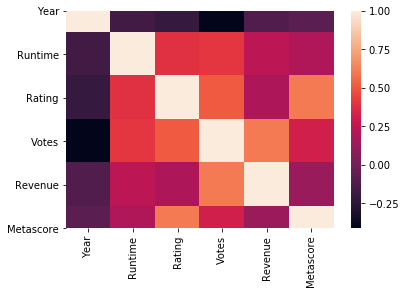

In [46]:
#first plot the this observation on the seeborn liberary
import seaborn as sns
sns.heatmap(corrmat)

In [47]:
#white colour showing that there is large correlation  and black correlation there is very less correlation.i.e. in thenegetive correlation
#here this shows that correlation between year, runtime, rating points, votes, and the Metascore and there is white value for representing the there is a large correlation and this black values that there is very less correlation that means  the negative correlation , so the correlation negative correlation shows very high in-between votes and years the positive correlation shows very high in between the ratings and the revenue and votes  
#if we wnat to see the same result on the matplotlib so we need to import it first upon.
import matplotlib.pyplot as plt
% matplotlib inline

UsageError: Line magic function `%` not found.


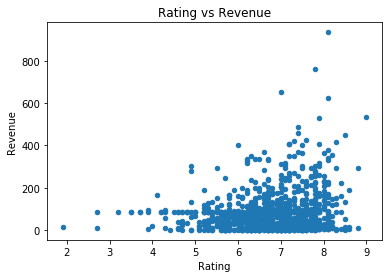

In [53]:
#now we are going to plot the relationship between the revenue and ratings with the help of scatterplot.
#dtframe.plot('kind = scatter',x = 'rating',y = 'Revenue') we dont having the data otherwise we have to add that one also after the  y axis input 
dtframe.plot(kind = 'scatter',x = 'Rating',y = 'Revenue',title ='Rating vs Revenue')

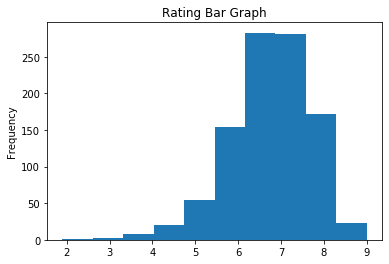

In [54]:
#now we creating the bar plot for the rating want is maximum number of rating and miniumn for that we creating the gragh for this one.
dtframe['Rating'].plot(kind = 'hist' ,title = 'Rating Bar Graph')


In [57]:
#here we can say at the raing 7 there high number of rating and in-between the 6 and 8 there is maximum number of rating.
#in our movie
#if we want to see the rating by manually for the cross check
dtframe['Rating'].value_counts()
# now see that maximum number of the rating is in the 6,7 and 8 form for the movie.

7.1    52
6.7    48
7.0    46
6.3    44
6.6    42
7.2    42
7.3    42
6.5    40
7.8    40
6.2    37
6.8    37
7.5    35
6.4    35
7.4    33
6.9    31
6.1    31
7.6    27
7.7    27
5.8    26
6.0    26
8.1    26
7.9    23
5.7    21
8.0    19
5.9    19
5.6    17
5.5    14
5.3    12
5.4    12
5.2    11
8.2    10
4.9     7
8.3     7
4.7     6
8.5     6
4.6     5
5.1     5
5.0     4
4.8     4
4.3     4
8.4     4
3.9     3
8.6     3
8.8     2
2.7     2
4.2     2
3.5     2
3.7     2
9.0     1
3.2     1
4.0     1
4.5     1
4.4     1
4.1     1
1.9     1
Name: Rating, dtype: int64

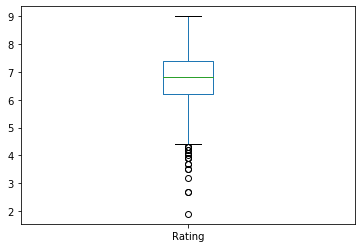

In [58]:
#now we will understand the raing with the help of box plot
dtframe['Rating'].plot(kind = 'box')

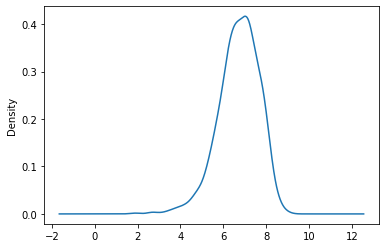

In [59]:
dtframe['Rating'].plot(kind = 'kde')

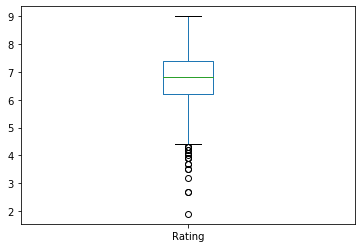

In [60]:
#below portion with the small balls called as outlier,if we see the some rating which is given in the  few  like 2,3, and 4 for this movie .
#but most of the concetation on 7
#if we see the same by the kie plot most of the concetration on the 7 rating and rating distruting inbetween 6 and 8 means at the 7
dtframe['Rating'].plot(kind = 'box')
#in that we having the small two lines these are represeting the two list value which is excluding to the outlier and in that we having the upper lines is knows as uper limit
#and another one is i.e.lower line that represent the lower limit value
#inbetween the upper and lower limit we having the middle poprtion whose the upper and lower portion called as upper quartier and lower quartier respetively.
#upper quarter = 25 % greter than the below value (data)
#lower quarter = 25 % lower than data is but less than this value(below value)
#it means that the 50% data valiable inbetween the upper and lower quarter
#and the centeral line in between two quarter is the median here median is some around or little less than the 7


In [68]:
#if we want to create the one more boxplot for the column for that we want to 
#we having the rating we want one more column to decribe it categories 
#but unfortunately we dont have so we need create it and add it before that we nedd to look at have some more detail to get the deatils about it
#so, have a look for this one here below,
# this how we can do it we need the one more column of category
#so lets do it for that

In [62]:
dtframe['Rating'].describe()

count    1000.000000
mean        6.723200
std         0.945429
min         1.900000
25%         6.200000
50%         6.800000
75%         7.400000
max         9.000000
Name: Rating, dtype: float64

In [ ]:
#here we having the min = 1.9 and 25% of data is less than 6.2 rating so lts consider that if we have rating less than the 6.2 then we will consider asbad movie otherwise it is 'good' if rating wil equal to gearter than this one.
#lets create the column

In [64]:
#we will use the for loop for that
list_cat =[]
for rate in dtframe['Rating']:
    if rate > 6.2:
        list_cat.append('Good')
    else:
        list_cat.append('Bad')
            
        


In [65]:
list_cat
#we crated the list according to the condition

['Good',
 'Good',
 'Good',
 'Good',
 'Bad',
 'Bad',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Bad',
 'Good',
 'Good',
 'Bad',
 'Bad',
 'Bad',
 'Good',
 'Good',
 'Good',
 'Good',
 'Bad',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Bad',
 'Good',
 'Good',
 'Good',
 'Good',
 'Bad',
 'Good',
 'Bad',
 'Good',
 'Bad',
 'Bad',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Bad',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Bad',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Bad',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Bad',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Good',
 'Bad',
 'Good',
 'Bad',
 'Good',
 'Good',
 'Good',
 'Bad',
 '

In [66]:
#here we can see that we had made the list and add in to the column of the datframe.
dtframe['Rating Category'] = list_cat
dtframe.head()

,Title,Genre,Description,Director,Actors,Year,Runtime,Rating,Votes,Revenue,Metascore,Rating Category
Rank,,,,,,,,,,,,
1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0,Good
2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0,Good
3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0,Good
4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0,Good
5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0,Bad


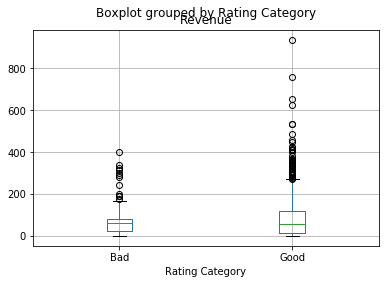

In [71]:
dtframe.boxplot( column = 'Revenue' , by = 'Rating Category' )

In [ ]:
#if we see here there few that really very bad but if we see the another side there we found that so many movie are avalible in the dataset
